# 1. Single Linear Regression - Video Game Sales
## (Using one feature to predict a continuous numerical target)
## https://www.kaggle.com/datasets/ulrikthygepedersen/video-games-sales

In [3]:
#Import Statments
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [4]:
# Loading video game sales data
df_VideoGame = pd.read_csv('video_games_sales.csv')

# Visualizing the dataframe
df_VideoGame

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


## Let's see if we can use a subset of this data to predict the target variable: global_sales

In [6]:
# Exctracting Features from the original df_VideoGame Dataset
df_VideoGameFeatureSubset = df_VideoGame[['platform', 'year', 'genre', 'publisher','na_sales', 'global_sales']]

# Dropping null values from the dataset
df_VideoGameFeatureSubset.dropna(inplace=True)
df_VideoGameFeatureSubset.isnull().sum()

/var/folders/tw/7t5t3x_11sqflkfn0yxds1lr0000gq/T/ipykernel_19747/2330514909.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_VideoGameFeatureSubset.dropna(inplace=True)


platform        0
year            0
genre           0
publisher       0
na_sales        0
global_sales    0
dtype: int64

In [10]:
# Initialize the labelencoder object
le_videogame = LabelEncoder()

# Save the unencoded feature platform (In case you want to decode later)
df_VideoGame_decoded_platform = df_VideoGameFeatureSubset['platform']

# Override the original platform feature with the label encoded feature
df_VideoGameFeatureSubset['platform'] = le_videogame.fit_transform(df_VideoGameFeatureSubset['platform'])

# Print out the decoded series, platform
df_VideoGame_decoded_platform

/var/folders/tw/7t5t3x_11sqflkfn0yxds1lr0000gq/T/ipykernel_19747/3575130277.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_VideoGameFeatureSubset['platform'] = le_videogame.fit_transform(df_VideoGameFeatureSubset['platform'])


0        Wii
1        NES
2        Wii
3        Wii
4         GB
        ... 
16593    GBA
16594     GC
16595    PS2
16596     DS
16597    GBA
Name: platform, Length: 16291, dtype: object

In [12]:
# Save the unencoded feature genre (In case you want to decode later)
df_VideoGame_decoded_genre = df_VideoGameFeatureSubset['genre']

# Override the original genre feature with the label encoded feature
df_VideoGameFeatureSubset['genre'] = le_videogame.fit_transform(df_VideoGameFeatureSubset['genre'])

# Print out the decoded series, genre
df_VideoGame_decoded_genre

/var/folders/tw/7t5t3x_11sqflkfn0yxds1lr0000gq/T/ipykernel_19747/3503678093.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_VideoGameFeatureSubset['genre'] = le_videogame.fit_transform(df_VideoGameFeatureSubset['genre'])


0              Sports
1            Platform
2              Racing
3              Sports
4        Role-Playing
             ...     
16593        Platform
16594         Shooter
16595          Racing
16596          Puzzle
16597        Platform
Name: genre, Length: 16291, dtype: object

In [14]:
# Save the unencoded feature publisher (In case you want to decode later)
df_VideoGame_decoded_publisher = df_VideoGameFeatureSubset['publisher']

# Override the original publisher feature with the label encoded feature
df_VideoGameFeatureSubset['publisher'] = le_videogame.fit_transform(df_VideoGameFeatureSubset['publisher'])

# Print out the decoded series, publisher
df_VideoGame_decoded_publisher

/var/folders/tw/7t5t3x_11sqflkfn0yxds1lr0000gq/T/ipykernel_19747/109776527.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_VideoGameFeatureSubset['publisher'] = le_videogame.fit_transform(df_VideoGameFeatureSubset['publisher'])


0          Nintendo
1          Nintendo
2          Nintendo
3          Nintendo
4          Nintendo
            ...    
16593         Kemco
16594    Infogrames
16595    Activision
16596      7G//AMES
16597       Wanadoo
Name: publisher, Length: 16291, dtype: object

In [16]:
# Feel free to uncomment the chart below, may take a little while to output though
#sns.pairplot(df_VideoGameFeatureSubset.drop('global_sales', axis=1), kind='kde')

In [18]:
# View the labelencoded dataframe
df_VideoGameFeatureSubset

,platform,year,genre,publisher,na_sales,global_sales
0,26,2006.0,10,359,41.49,82.74
1,11,1985.0,4,359,29.08,40.24
2,26,2008.0,6,359,15.85,35.82
3,26,2009.0,10,359,15.75,33.00
4,5,1996.0,7,359,11.27,31.37
...,...,...,...,...,...,...
16593,6,2002.0,4,269,0.01,0.01
16594,7,2003.0,8,241,0.01,0.01
16595,16,2008.0,6,21,0.00,0.01
16596,4,2010.0,5,8,0.00,0.01


In [20]:
# Normailze platform, year, genre, and publisher
mm_scaler = MinMaxScaler(feature_range=(-1, 1))

df_VideoGameFeatureSubset[['platform', 'year', 'genre', 'publisher']] = mm_scaler.fit_transform(df_VideoGameFeatureSubset[['platform', 'year', 'genre', 'publisher']])
df_VideoGameFeatureSubset

/var/folders/tw/7t5t3x_11sqflkfn0yxds1lr0000gq/T/ipykernel_19747/2534807158.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_VideoGameFeatureSubset[['platform', 'year', 'genre', 'publisher']] = mm_scaler.fit_transform(df_VideoGameFeatureSubset[['platform', 'year', 'genre', 'publisher']])


,platform,year,genre,publisher,na_sales,global_sales
0,0.733333,0.30,0.818182,0.248696,41.49,82.74
1,-0.266667,-0.75,-0.272727,0.248696,29.08,40.24
2,0.733333,0.40,0.090909,0.248696,15.85,35.82
3,0.733333,0.45,0.818182,0.248696,15.75,33.00
4,-0.666667,-0.20,0.272727,0.248696,11.27,31.37
...,...,...,...,...,...,...
16593,-0.600000,0.10,-0.272727,-0.064348,0.01,0.01
16594,-0.533333,0.15,0.454545,-0.161739,0.01,0.01
16595,0.066667,0.40,0.090909,-0.926957,0.00,0.01
16596,-0.733333,0.50,-0.090909,-0.972174,0.00,0.01


In [22]:
# Create a pairplot for the normalized data, columns_to_manipulate, use kde for the kind
#sns.pairplot(df_VideoGameFeatureSubset, kind='kde')

In [24]:
# Save Checkpoint
df_VideoGameFeatureSubset.to_csv('Game_Data_Cleaned.csv')

In [26]:
# Load the cleaned video game sales data into a dataframe
df_VideoGameCleaned = pd.read_csv('Game_Data_Cleaned.csv')

# Remove the column named 'Unnamed: 0'


# print out the dataframe


In [ ]:
# use the pandas dataframe function called .corr() to quickly check which features most closely 'relate' to the target variable, higher is better


In [ ]:
# create a 2D scatter plot to 'eyeball' the relationship between your chosen feature and global_sales


In [ ]:
# Seperate the Features and the Target


In [ ]:
# Print the feature dataframe


In [ ]:
# Print the target dataframe


In [1]:
# use train_test_split to get your dataset ready for training and testing


# print out the shape of the trainig and testing, feature and targets
print('Shape of X_train: ', )
print('Shape of X_test: ',)
print('Shape of y_train: ',)
print('Shape of y_test: ',)

Shape of X_train: 
Shape of X_test: 
Shape of y_train: 
Shape of y_test: 


In [28]:
# Import the LinearRegression class from sklearn.linear_model
from sklearn.linear_model import LinearRegression

# Initalize the LinearRegression object


#!!! Important !!!
# Fit your Linear Regressor on only ** one ** of the features in your X's, 
# HINT: If you have multiple features in your X_train, select your chosen feature for singular linear regression and make a new dataframe


# Get your predictions from your fitted model

# use the model's class function .score to calculate the r^2 value

# print out the r2 vaule for the linear regressor


In [ ]:
# Coefficients and intercept (y = wx + b), where w is the weight, or coefficent of x, and b is the y-intercept
print(f'Coefficients: {lr.coef_}')
print(f'Intercept: {lr.intercept_}')

In [ ]:
# Use a scatter plot to show how the line passes through the dataset
# You can optionally spilt the train and test set by color, and plot the line by passing X_test, and y_pred


### Linear Regression Questions: 

1. What was the final r^2 value of your model? 
2.  What does this tell us? 

- [Your Answer Here]

3. Can we get more performance from this model? 
4. If so, how? If not, why?
- [Your Answer Here]

5. Would it be beneficial to perform multiple linear regresssion? I.e. use several features to predict the target?
6. Why?
- [Your Answer Here]

7. Why is there one feature in particular that tracks so well with the target, global_sales?
- [Your Answer Here]

# 2. Multi Classification - Classify the *"Quality"* variable (3~9) for Wine Data
## Use the numeric features in the wine dataset to predict a 'class'
## https://www.kaggle.com/datasets/yasserh/wine-quality-dataset/data

In [30]:
# Load the wine dataset
df_wine = pd.read_csv('wine_data.csv')
df_wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
20995,9.7,1.020,0.91,50.00,0.412,114.6,181.7,1.02085,3.30,0.89,12.0,9
20996,10.2,0.610,0.88,53.80,0.250,62.4,204.7,1.02776,3.52,1.14,9.7,9
20997,13.4,0.460,1.04,52.10,0.449,63.0,273.5,1.02618,2.89,1.76,9.3,9
20998,6.6,1.030,1.09,25.30,0.138,179.8,295.0,1.02476,2.94,1.54,12.9,9


In [32]:
# this feature will be our target variable
df_wine.quality.unique()

array([3, 4, 5, 6, 7, 8, 9])

In [34]:
df_wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,9.797079,0.774796,0.793870,31.289348,0.200245,129.442333,229.008762,1.009972,3.158712,1.020641,11.291716,6.000000
std,2.413919,0.365015,0.384833,19.015391,0.124933,77.167262,100.183265,0.012032,0.171371,0.408304,1.182198,2.000048
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,7.600000,0.430000,0.410000,9.800000,0.072000,45.000000,150.000000,0.997417,3.030000,0.620000,10.400000,4.000000
50%,10.000000,0.830000,0.870000,37.600000,0.205000,145.800000,240.500000,1.012200,3.150000,1.080000,11.300000,6.000000
75%,11.800000,1.080000,1.110000,46.800000,0.298000,194.325000,311.625000,1.019840,3.270000,1.360000,12.200000,8.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [36]:
y = df_wine.quality
y

0        3
1        3
2        3
3        3
4        3
        ..
20995    9
20996    9
20997    9
20998    9
20999    9
Name: quality, Length: 21000, dtype: int64

In [38]:
X = df_wine.drop('quality', axis=1)
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0
...,...,...,...,...,...,...,...,...,...,...,...
20995,9.7,1.020,0.91,50.00,0.412,114.6,181.7,1.02085,3.30,0.89,12.0
20996,10.2,0.610,0.88,53.80,0.250,62.4,204.7,1.02776,3.52,1.14,9.7
20997,13.4,0.460,1.04,52.10,0.449,63.0,273.5,1.02618,2.89,1.76,9.3
20998,6.6,1.030,1.09,25.30,0.138,179.8,295.0,1.02476,2.94,1.54,12.9


In [40]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler(feature_range=(-1, 1))

X = mm_scaler.fit_transform(X)
X = pd.DataFrame(data=X, columns=df_wine.drop('quality', axis=1).columns)
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,0.289256,-0.333333,-0.204819,-0.950920,-0.784053,-0.937500,-0.811060,-0.472142,-0.178295,-0.606742,-0.710145
1,0.090909,-0.293333,-0.409639,-0.953988,-0.365449,-0.972222,-0.953917,-0.526123,-0.317829,-0.539326,-0.884058
2,-0.404959,0.473333,-1.000000,-0.888037,-0.707641,-0.972222,-0.963134,-0.634085,0.410853,-0.640449,-0.217391
3,0.090909,-0.520000,-0.493976,-0.972393,-0.548173,-0.770833,-0.806452,-0.567766,0.023256,-0.280899,-0.449275
4,-0.256198,0.253333,-0.975904,-0.914110,-0.750831,-0.965278,-0.976959,-0.544631,0.178295,-0.696629,-0.130435
...,...,...,...,...,...,...,...,...,...,...,...
20995,-0.024793,0.253333,0.096386,0.515337,0.338870,-0.211111,-0.190323,0.300945,-0.100775,-0.247191,0.159420
20996,0.057851,-0.293333,0.060241,0.631902,-0.199336,-0.573611,-0.084332,0.567380,0.240310,0.033708,-0.507246
20997,0.586777,-0.493333,0.253012,0.579755,0.461794,-0.569444,0.232719,0.506458,-0.736434,0.730337,-0.623188
20998,-0.537190,0.266667,0.313253,-0.242331,-0.571429,0.241667,0.331797,0.451706,-0.658915,0.483146,0.420290


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state=1)

print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ',X_test.shape)
print('Shape of y_train: ',y_train.shape)
print('Shape of y_test: ',y_test.shape)

Shape of X_train:  (16800, 11)
Shape of X_test:  (4200, 11)
Shape of y_train:  (16800,)
Shape of y_test:  (4200,)


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Initialize and train a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

Accuracy: 0.6314285714285715
              precision    recall  f1-score   support

           3       0.58      0.66      0.62       633
           4       0.59      0.59      0.59       593
           5       0.77      0.63      0.69       611
           6       0.69      0.75      0.72       594
           7       0.75      0.51      0.61       612
           8       0.57      0.59      0.58       575
           9       0.55      0.70      0.62       582

    accuracy                           0.63      4200
   macro avg       0.64      0.63      0.63      4200
weighted avg       0.64      0.63      0.63      4200



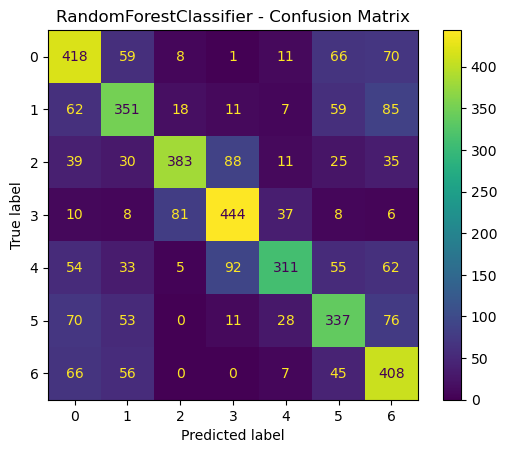

In [45]:
# Calculate the confusion matrix by passing the true y lables, and the predicted y lables
cm = confusion_matrix(y_test, y_pred)

# Use the ConfusionMatrixDisplay from skelearn to get a quick and easy graph
ConfusionMatrixDisplay(cm).plot()
plt.title('RandomForestClassifier - Confusion Matrix')
plt.show()

### Multiclass Classifier Questions
1. Summarize the steps I took to create this multiclass classifier

   -
   -
   -
   -
   -
2. Interpret the Confusion Matrix and Classification Report

3. How could we improve this model? Be specific.

   -
   -
   -
4. What other models might be good to solve this problem?
5. What are the potential downsides of solving this as a classification problem?
6. What are the benifits of solving this as a classification problem?
   

# 3. Binary Classification - Cure The Princess
## https://www.kaggle.com/datasets/unmoved/cure-the-princess

In [48]:
df_Quest = pd.read_csv('Cure_the_princess.csv')
df_Quest

,Phoenix Feather,Unicorn Horn,Dragon's Blood,Mermaid Tears,Fairy Dust,Goblin Toes,Witch's Brew,Griffin Claw,Troll Hair,Kraken Ink,Minotaur Horn,Basilisk Scale,Chimera Fang,Cured
0,2.4,18.7,18.4,27.9,7.9,9.6,18.3,13.2,2.5,26.0,10.5,26.2,12.5,0
1,2.1,6.0,15.0,13.3,15.6,13.1,11.0,5.0,7.2,26.0,1.5,13.3,6.2,0
2,17.2,13.9,23.8,6.8,10.7,15.8,19.4,2.7,15.4,21.2,11.1,16.6,11.4,1
3,8.4,9.7,6.8,26.9,4.6,29.1,14.6,19.7,18.0,20.8,13.6,13.9,8.1,1
4,22.1,10.8,16.4,10.5,22.0,23.4,2.6,18.2,23.8,11.3,5.5,16.8,16.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,9.4,2.2,15.8,5.9,29.7,18.7,11.5,13.1,15.3,22.5,10.1,4.7,13.8,0
2334,12.1,7.6,20.6,5.3,18.9,19.1,9.4,11.9,21.8,12.0,26.7,8.4,24.4,1
2335,15.2,33.2,7.2,14.5,16.0,16.7,1.2,32.5,34.5,25.9,3.9,18.0,19.2,1
2336,2.0,17.0,33.2,13.2,29.1,35.5,19.7,30.3,30.7,4.3,15.7,20.5,2.1,1


In [50]:
# Envoke the describe command on the dataset


In [52]:
# Plot the values from the .corr() command on a heat map


In [ ]:
# Seperate your ingredients (features) from the outcome (target)
X = df_Quest.drop('Cured', axis=1)
X

In [ ]:
# Seperate out Cured (target)
y = df_Quest.Cured
y

In [ ]:
# Import MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Initalize the MinMaxScaler with feature_range=(-1, 1)

# Transform the Ingridents (X) using the MinMaxScaler


In [ ]:
# Seperate the training and testing data using the train_test_split function


# print the shape of your datasets
print('Shape of X_train: ',)
print('Shape of X_test: ',)
print('Shape of y_train: ',)
print('Shape of y_test: ',)

In [ ]:
# Import Statements
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score, RocCurveDisplay

# Initialize and train a LogisticRegressior

# Make class predictions 

# Make probability predicitons, named y_proba

# Evaluate accuracy using the accuracy_score function from sklearn

# print the classification_report for your logistic regressor


In [54]:
# Create a confusion matrix using the confusion_matrix function, and save it to a variable named cm

# Using ConfusionMatrixDisplay pass your variable named cm that you just created


In [ ]:
# use the (receiver operating characteristic) roc_curve function to calculate the falsepositive_rate, truepositive_rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])

# use the roc_auc_score to calculate the Area Under the Curve (AUC)
auc = roc_auc_score(y_test, y_proba[:, 1])

In [ ]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(False)
plt.show()

### Cure the Princess
1. What ingredients should you use?
2. How can you be certain that these are the correct ingredients?
3. Can you determine the **exact ratio** of ingredients that maximizes the princess' survival?
4. Should attempt to convience the king that you know to cure the princess, or should you conduct more experiments?
5. *Assuming* that you are ready to cure the princess, convince the king.